# Ensemble Techniques
Combining Multiple Small Models to create a larger complex model
1. Bagging --> Random Forest
2. Boosting --> Gradient Boosting, xgboost

In [ ]:
from warnings import filterwarnings

filterwarnings("ignore")

### Step 1 - Data Ingestion

In [1]:
import pandas as pd

df = pd.read_csv("train_loan.csv")
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


### Target Feature - Loan Status
1. 0 - Not Approved
2. 1 - Approved

### Step 2 - Data Quality Checks

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [3]:
m = df.isna().sum()
m

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(0)

### Step 3 - Separate X & Y (Target Feature - Loan Status)

In [5]:
X = df.drop(columns=["id", "loan_status"])
Y = df[["loan_status"]]

In [6]:
X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3


In [7]:
Y.head()

,loan_status
0,0
1,0
2,0
3,0
4,0


In [ ]:
# Display how mnay loans are approved and not approved
Y.value_counts()

loan_status
0              50295
1               8350
Name: count, dtype: int64

<Axes: title={'center': 'Loan Status Distribution'}, xlabel='Loan Status', ylabel='Count'>

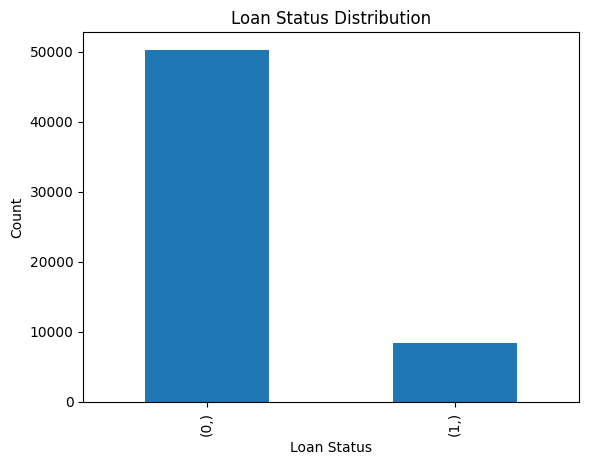

In [9]:
Y.value_counts().plot(
    kind="bar", title="Loan Status Distribution", xlabel="Loan Status", ylabel="Count"
)

### Step 4 - Preprocessing on X

In [10]:
X.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [16]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

In [13]:
cat = list(X.columns[X.dtypes == "object"])
con = list(X.columns[X.dtypes != "object"])

In [14]:
cat

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [15]:
con

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [17]:
num_pipe = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [18]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first"),
)

In [19]:
pre = ColumnTransformer([("num", num_pipe, con), ("cat", cat_pipe, cat)]).set_output(
    transform="pandas"
)

In [21]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,...,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_Y
0,1.566200,-0.765768,-1.187200,-0.578306,0.267616,0.117378,2.031798,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.920057,-0.212128,0.328047,-0.937775,0.880532,-0.973242,-0.946489,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.240196,-0.929223,0.833130,-0.578306,-0.585854,0.553626,1.039036,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.405947,0.156966,2.348377,0.500101,0.142396,0.117378,-0.201917,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.920057,-0.106673,-0.682117,-0.578306,-1.238314,-0.646056,-0.698298,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['person_age', 'person_income',
                                  'person_emp_length', 'loan_amnt',
                                  'loan_int_rate', 'loan_percent_income',
                                  'cb_person_cred_hist_length']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['person_home_ownership', 'loan_intent',
                                  'loan_grade', 'cb_person_default_on_file'])])

### Step 5 - Train Test Split

In [23]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    X_pre, Y, test_size=0.4, random_state=42
)

In [24]:
xtrain.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,...,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_Y
26036,-0.257055,0.947880,-1.187200,1.039305,1.045295,-0.100746,-0.698298,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7763,-0.920057,-0.660313,-0.682117,1.039305,0.267616,2.407679,-0.450108,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
26018,-0.091305,0.552423,-0.429576,1.937978,-0.104748,0.880811,0.790845,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25229,0.405947,-0.370311,-0.429576,-0.758041,-1.544772,-0.646056,0.294464,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55260,1.400450,-0.633949,-1.187200,-0.218837,1.902060,0.444564,1.783608,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [25]:
xtest.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,...,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_Y
4657,-0.754307,-0.633949,-1.187200,-0.991696,-0.882427,-0.755118,-0.450108,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56440,-0.422806,-0.106673,1.085671,-0.758041,-0.688007,-0.864180,-0.450108,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42117,0.737448,0.059419,-1.187200,1.937978,0.610322,1.098935,0.046274,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10849,-0.920057,-0.897587,-1.187200,-0.758041,-0.028957,0.117378,-0.946489,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
39395,-0.091305,-0.106673,-0.934659,-0.398572,0.504874,-0.427932,1.039036,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
ytrain.head()

,loan_status
26036,0
7763,1
26018,0
25229,0
55260,0


In [27]:
ytest.head()

,loan_status
4657,0
56440,0
42117,1
10849,0
39395,0


In [28]:
xtrain.shape

(35187, 22)

In [29]:
xtest.shape

(23458, 22)

### Step 6 - Model Building
1. Random Forest - Random Trees
2. GradientBoosting - Decision Trees are made one by one
3. xgboost (extreme gradient boosting) --> Fastest and Most Efficient

# Random Forest

In [30]:
# Difference between RandomForestClassifier and RandomForestRegressor
# - RandomForestClassifier is used for classification tasks (predicting categories).
# - RandomForestRegressor is used for regression tasks (predicting continuous values).
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(
    n_estimators=1,
    max_depth=1,
    min_samples_split=5,
    min_samples_leaf=5,
    criterion="gini",
    random_state=42,
)
model1.fit(xtrain, ytrain)

c:\Machine Learning\.venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=1, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=1, random_state=42)

In [31]:
model1.score(xtrain, ytrain), model1.score(xtest, ytest)

(0.8887373177593998, 0.8902293460653082)

In [32]:
from sklearn.metrics import f1_score

ypred_test = model1.predict(xtest)
f1_score(ytest, ypred_test, average="macro")

0.7217745333374512

### Hyperparameter Tuning

In [42]:
params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 4, 5],
    "criterion": ["gini", "entropy"],
}
params

{'n_estimators': [50, 100, 200],
 'max_depth': [3, 4, 5],
 'criterion': ['gini', 'entropy']}

In [43]:
from sklearn.model_selection import RandomizedSearchCV

rfc = RandomForestClassifier(random_state=42)
rscv_rfc = RandomizedSearchCV(
    estimator=rfc,
    param_distributions=params,
    scoring="f1_macro",
    cv=5,
    n_jobs=-1,
)
rscv_rfc.fit(xtrain, ytrain)

c:\Machine Learning\.venv\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [50, 100, 200]},
                   scoring='f1_macro')

In [44]:
rscv_rfc.best_params_

{'n_estimators': 200, 'max_depth': 5, 'criterion': 'gini'}

In [45]:
rscv_rfc.best_score_

np.float64(0.8491990970028299)

In [46]:
best_rfc = rscv_rfc.best_estimator_
best_rfc

RandomForestClassifier(max_depth=5, n_estimators=200, random_state=42)

In [47]:
best_rfc.score(xtrain, ytrain), best_rfc.score(xtest, ytest)

(0.938443175036235, 0.9361411885071191)

In [51]:
ypred_test1 = best_rfc.predict(xtest)
ypred_test1[0:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [49]:
ytest.head()

,loan_status
4657,0
56440,0
42117,1
10849,0
39395,0


In [50]:
f1_score(ytest, ypred_test1, average="macro")

0.8433055427414815

# Gradient Boosting

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting

model2 = GradientBoostingClassifier(
    n_estimators=1,
    max_depth=1,
    min_samples_split=5,
    min_samples_leaf=5,
    learning_rate=0.00001,
)
model2.fit(xtrain, ytrain)

c:\Machine Learning\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(learning_rate=1e-05, max_depth=1, min_samples_leaf=5,
                           min_samples_split=5, n_estimators=1)

In [53]:
model2.score(xtrain, ytrain), model2.score(xtest, ytest)

(0.8563958280046609, 0.8594509335834257)

In [54]:
ypred_test3 = model2.predict(xtest)
ypred_test3[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [55]:
f1_score(ytest, ypred_test3, average="macro")

0.4622068364703455

### Hyperparameter Tuning

In [56]:
params2 = {
    "learning_rate": [0.1, 0.2],
    "n_estimators": [100, 200],
    "max_depth": [3, 4, 5],
}
params2

{'learning_rate': [0.1, 0.2],
 'n_estimators': [100, 200],
 'max_depth': [3, 4, 5]}

In [58]:
gbc = GradientBoostingClassifier(random_state=42)
rscv_gbc = RandomizedSearchCV(
    estimator=gbc,
    param_distributions=params2,
    scoring="f1_macro",
    cv=5,
    n_jobs=-1,
)
rscv_gbc.fit(xtrain, ytrain)

c:\Machine Learning\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.2],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [100, 200]},
                   scoring='f1_macro')

In [59]:
rscv_gbc.best_params_

{'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.1}

In [60]:
rscv_gbc.best_score_

np.float64(0.8918441894364857)

In [61]:
best_gbc = rscv_gbc.best_estimator_
best_gbc

GradientBoostingClassifier(max_depth=4, n_estimators=200, random_state=42)

In [62]:
best_gbc.score(xtrain, ytrain), best_gbc.score(xtest, ytest)

(0.9575979765254213, 0.9507630659050217)

In [65]:
ypred_test4 = best_gbc.predict(xtest)
ypred_test4[0:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [66]:
ytest.head()

,loan_status
4657,0
56440,0
42117,1
10849,0
39395,0


In [67]:
f1_score(ytest, ypred_test4, average="macro")

0.8880874877770935

# XGBoost (Extreme Gradient Boosting)

In [70]:
!uv add xgboost

Resolved 55 packages in 573ms
Prepared 1 package in 12.90s
Installed 1 package in 22ms
 + xgboost==3.0.2


In [71]:
import xgboost as xgb

# XGBoost (Extreme Gradient Boosting)

xgb_model = xgb.XGBClassifier(maax_depth=3)
xgb_model.fit(xtrain, ytrain)

c:\Machine Learning\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:34:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "maax_depth" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, maax_depth=3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, ...)

In [72]:
xgb_model.score(xtrain, ytrain), xgb_model.score(xtest, ytest)

(0.9685679370221957, 0.9493989257396197)

In [75]:
ypred_test5 = xgb_model.predict(xtest)
ypred_test5[0:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [76]:
f1_score(ytest, ypred_test5, average="macro")

0.8863678277614562

In [80]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb_model, xtrain, ytrain, cv=5, scoring="f1_macro", n_jobs=-1)
scores

array([0.88024918, 0.89421307, 0.89384759, 0.8935478 , 0.88809349])

In [81]:
scores.mean()

np.float64(0.8899902264850434)

### Scores

Random Forest

In [63]:
best_rfc.score(xtrain, ytrain), best_rfc.score(xtest, ytest)

(0.938443175036235, 0.9361411885071191)

In [84]:
rscv_rfc.best_score_

np.float64(0.8491990970028299)

In [69]:
f1_score(ytest, ypred_test1, average="macro")

0.8433055427414815

Gradient Boosting

In [64]:
best_gbc.score(xtrain, ytrain), best_gbc.score(xtest, ytest)

(0.9575979765254213, 0.9507630659050217)

In [83]:
rscv_gbc.best_score_

np.float64(0.8918441894364857)

In [68]:
f1_score(ytest, ypred_test4, average="macro")

0.8880874877770935

xgboost

In [73]:
xgb_model.score(xtrain, ytrain), xgb_model.score(xtest, ytest)

(0.9685679370221957, 0.9493989257396197)

In [77]:
f1_score(ytest, ypred_test5, average="macro")

0.8863678277614562

cross_val_score for xgboost

In [82]:
scores

array([0.88024918, 0.89421307, 0.89384759, 0.8935478 , 0.88809349])

# Based on 2 parameters
1. Time Taken
2. Cross Validation f1_macro
### XGBoost is better

### Step 7- Feature Importances

In [85]:
xgb_model.feature_importances_

array([0.00627078, 0.01674788, 0.01294872, 0.00546738, 0.02134936,
       0.07298739, 0.00501361, 0.00591618, 0.03553265, 0.11140081,
       0.01519315, 0.03689217, 0.02999141, 0.0222609 , 0.0229979 ,
       0.00468972, 0.03472264, 0.37657407, 0.15383995, 0.00272454,
       0.00138588, 0.00509294], dtype=float32)

In [86]:
imp = pd.Series(
    xgb_model.feature_importances_,
    index=xtrain.columns,
).sort_values(ascending=False)
imp

cat__loan_grade_D                   0.376574
cat__loan_grade_E                   0.153840
cat__person_home_ownership_RENT     0.111401
num__loan_percent_income            0.072987
cat__loan_intent_HOMEIMPROVEMENT    0.036892
cat__person_home_ownership_OWN      0.035533
cat__loan_grade_C                   0.034723
cat__loan_intent_MEDICAL            0.029991
cat__loan_intent_VENTURE            0.022998
cat__loan_intent_PERSONAL           0.022261
num__loan_int_rate                  0.021349
num__person_income                  0.016748
cat__loan_intent_EDUCATION          0.015193
num__person_emp_length              0.012949
num__person_age                     0.006271
cat__person_home_ownership_OTHER    0.005916
num__loan_amnt                      0.005467
cat__cb_person_default_on_file_Y    0.005093
num__cb_person_cred_hist_length     0.005014
cat__loan_grade_B                   0.004690
cat__loan_grade_F                   0.002725
cat__loan_grade_G                   0.001386
dtype: flo

<Axes: title={'center': 'Feature Importances'}, xlabel='Features', ylabel='Importance'>

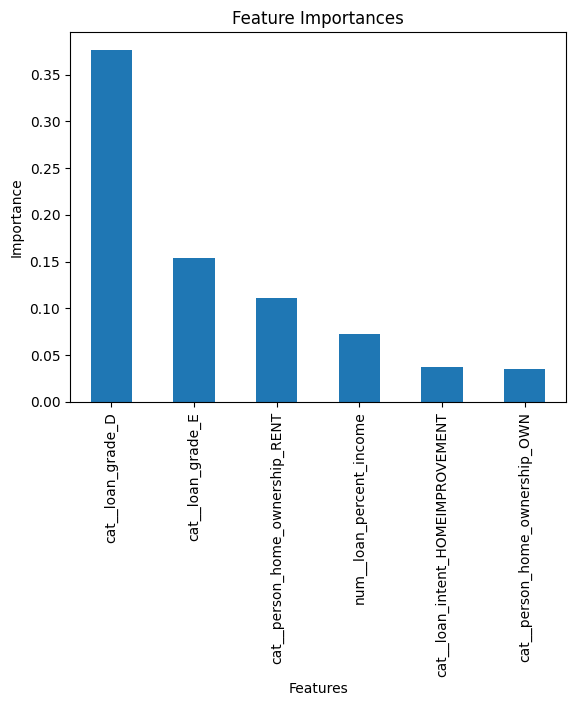

In [88]:
imp[0:6].plot(
    kind="bar", title="Feature Importances", xlabel="Features", ylabel="Importance"
)

### Step 8 - Model Evaluation

In [89]:
xgb_model.score(xtrain, ytrain), xgb_model.score(xtest, ytest)

(0.9685679370221957, 0.9493989257396197)

In [92]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

print(classification_report(ypred_test5, ytest))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97     20768
           1       0.73      0.89      0.80      2690

    accuracy                           0.95     23458
   macro avg       0.86      0.92      0.89     23458
weighted avg       0.96      0.95      0.95     23458



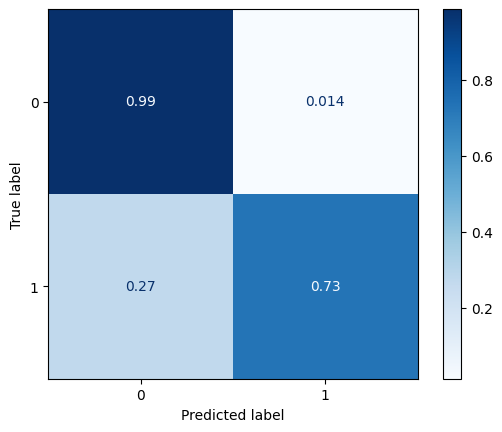

In [95]:
ConfusionMatrixDisplay.from_estimator(
    xgb_model, xtest, ytest, cmap="Blues", normalize="true"
)

### Step 9 - Out of Sample Prediction

In [96]:
xnew = pd.read_csv("test_loan.csv")
xnew.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [97]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['person_age', 'person_income',
                                  'person_emp_length', 'loan_amnt',
                                  'loan_int_rate', 'loan_percent_income',
                                  'cb_person_cred_hist_length']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['person_home_ownership', 'loan_intent',
                                  'loan_grade', 'cb_person_default_on_file'])])

In [98]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,cat__person_home_ownership_RENT,...,cat__loan_intent_MEDICAL,cat__loan_intent_PERSONAL,cat__loan_intent_VENTURE,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_Y
0,-0.754307,0.130602,-0.429576,2.836651,1.674687,2.189555,-0.946489,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.257055,0.842425,0.328047,0.140632,0.659750,-0.646056,-0.450108,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.257055,-0.897587,0.075506,-0.937775,2.145908,-0.318870,-0.946489,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.903198,-0.370311,-0.177035,-0.398572,-0.585854,-0.209808,0.294464,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.257055,1.000608,0.833130,1.039305,1.859221,-0.100746,-0.450108,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [99]:
preds = xgb_model.predict(xnew_pre)
preds[0:10]

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [100]:
probs = xgb_model.predict_proba(xnew_pre)
probs[0:10]

array([[4.73260880e-05, 9.99952674e-01],
       [9.86021101e-01, 1.39788985e-02],
       [1.05993569e-01, 8.94006431e-01],
       [9.89070415e-01, 1.09295668e-02],
       [9.53962803e-01, 4.60371785e-02],
       [2.40642428e-02, 9.75935757e-01],
       [9.99907851e-01, 9.21264436e-05],
       [9.97325540e-01, 2.67447717e-03],
       [6.33335412e-01, 3.66664588e-01],
       [9.84558642e-01, 1.54413339e-02]], dtype=float32)

In [101]:
xgb_model.classes_

array([0, 1])

In [102]:
probs_approach = probs[
    :, 1
]  # Assuming binary classification, get probabilities for the positive class
probs_approach[0:10]

array([9.99952674e-01, 1.39788985e-02, 8.94006431e-01, 1.09295668e-02,
       4.60371785e-02, 9.75935757e-01, 9.21264436e-05, 2.67447717e-03,
       3.66664588e-01, 1.54413339e-02], dtype=float32)

In [107]:
res = xnew["id"]
res

0        58645
1        58646
2        58647
3        58648
4        58649
         ...  
39093    97738
39094    97739
39095    97740
39096    97741
39097    97742
Name: id, Length: 39098, dtype: int64

In [109]:
res["loan_status"] = preds
res["probability"] = probs_approach.round(4)

In [114]:
res.head()

0    58645
1    58646
2    58647
3    58648
4    58649
Name: id, dtype: object

### Step 10 - Save and Load

In [115]:
import joblib

joblib.dump(pre, "pre.joblib")
joblib.dump(xgb_model, "xgb_model.joblib")

['xgb_model.joblib']

In [116]:
p = joblib.load("pre.joblib")
p

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['person_age', 'person_income',
                                  'person_emp_length', 'loan_amnt',
                                  'loan_int_rate', 'loan_percent_income',
                                  'cb_person_cred_hist_length']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['person_home_ownership', 'loan_intent',
                                  'loan_grade', 'cb_person_default_on_file'])])

In [117]:
m = joblib.load("xgb_model.joblib")
m

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, maax_depth=3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, ...)

In [118]:
m.score(xtrain, ytrain), m.score(xtest, ytest)

(0.9685679370221957, 0.9493989257396197)